<a href="https://colab.research.google.com/github/SelvamathanS/Random_Forest_Classifier-to-classify-Diabetes/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Random Forest***

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load dataset
d = pd.read_csv("/content/drive/MyDrive/Notes/Ai training 5.1.26 onwards/Dataset/diabetes.csv")
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x = d.drop('Outcome', axis=1)
y = d['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7467532467532467


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



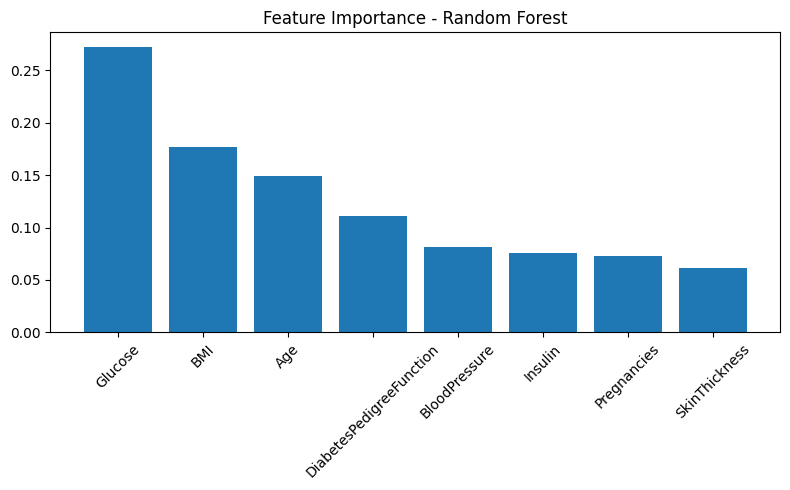

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=45)
plt.tight_layout()
plt.show()


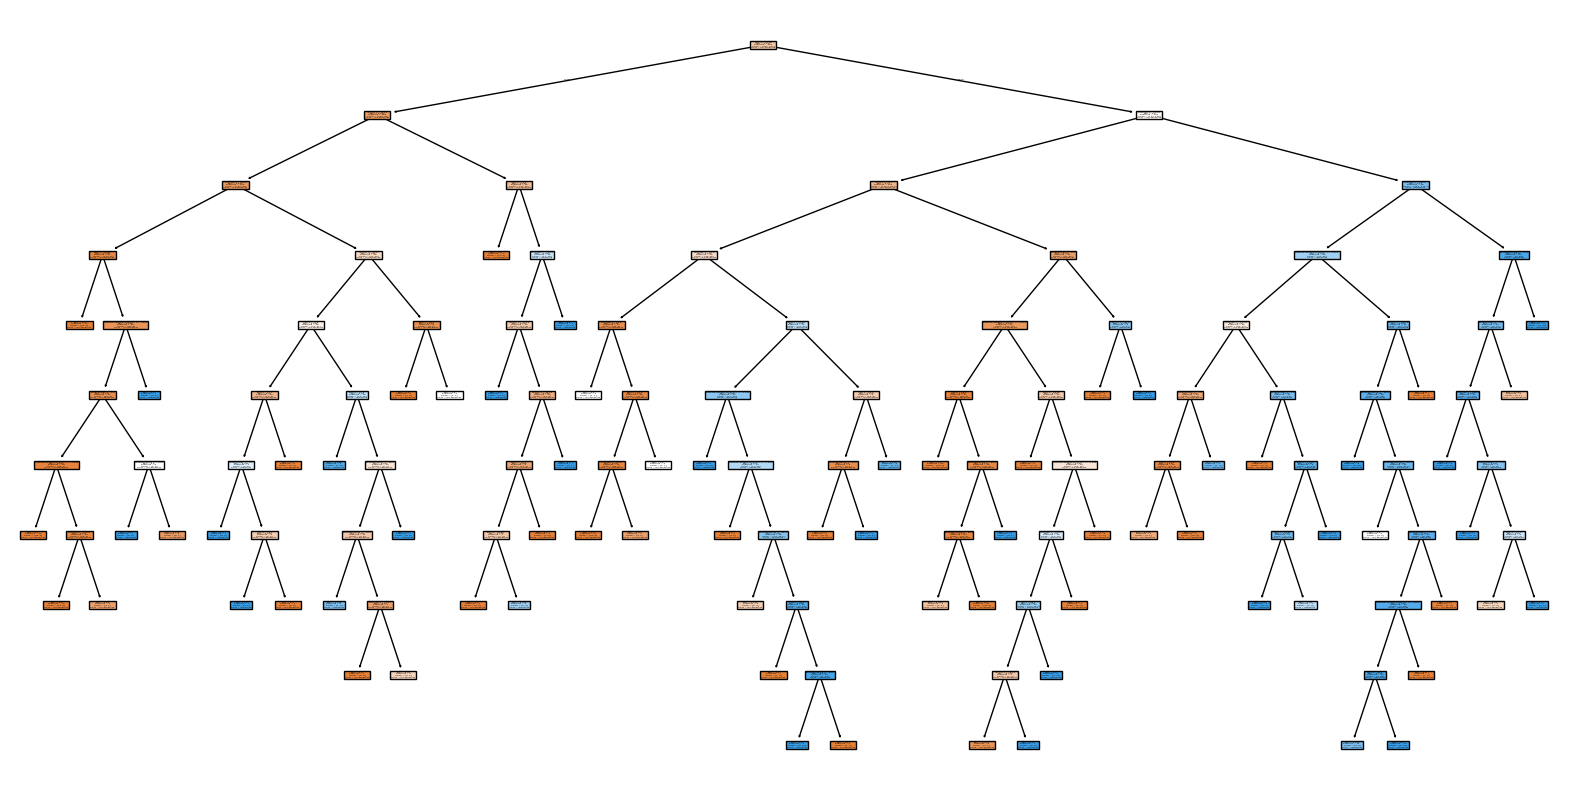

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    rf.estimators_[0],   # visualize first tree
    feature_names=x.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True
)
plt.show()
